In [17]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_data_spectrum = pickle.load(open('../data/train/spectrum.pkl', 'rb'))
test_data_spectrum = pickle.load(open('../data/test/spectrum.pkl', 'rb'))

# test = pickle.load(open('../data/train/theospec.pkl', 'rb'))

In [18]:
# print(train_data_spectrum.keys())
# print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'].keys())
# print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994].keys())
# # print(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr'])

# # Data layout
# # mzml file: {scan number: {mz_arr: [], intensity_arr: [] }}

# print(test)
# print(test.keys())

In [19]:
# Collect array lengths
# Same for mz and intensity arrs
mz_lens = []
for scan_num in train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML']:
    mz_lens.append(len(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']))

In [20]:
# print(mz_lens)

<Axes: ylabel='Count'>

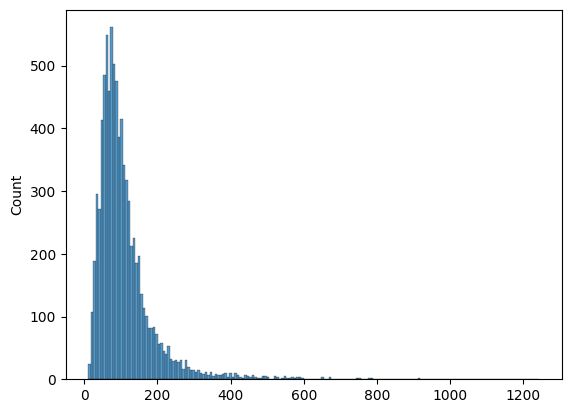

In [21]:
# Distribution of mz_lens
sns.histplot(mz_lens)

In [22]:
# For mz_lens, print num of lens from 100 to 200, 200 to 300, etc
for i in range(0, 3000, 100):
    print('mz_lens from {} to {}: {}'.format(i, i+100, len([x for x in mz_lens if x >= i and x < i+100])))

mz_lens from 0 to 100: 4780
mz_lens from 100 to 200: 2777
mz_lens from 200 to 300: 500
mz_lens from 300 to 400: 136
mz_lens from 400 to 500: 72
mz_lens from 500 to 600: 41
mz_lens from 600 to 700: 14
mz_lens from 700 to 800: 14
mz_lens from 800 to 900: 3
mz_lens from 900 to 1000: 5
mz_lens from 1000 to 1100: 4
mz_lens from 1100 to 1200: 0
mz_lens from 1200 to 1300: 1
mz_lens from 1300 to 1400: 0
mz_lens from 1400 to 1500: 0
mz_lens from 1500 to 1600: 0
mz_lens from 1600 to 1700: 0
mz_lens from 1700 to 1800: 0
mz_lens from 1800 to 1900: 0
mz_lens from 1900 to 2000: 0
mz_lens from 2000 to 2100: 0
mz_lens from 2100 to 2200: 0
mz_lens from 2200 to 2300: 0
mz_lens from 2300 to 2400: 0
mz_lens from 2400 to 2500: 0
mz_lens from 2500 to 2600: 0
mz_lens from 2600 to 2700: 0
mz_lens from 2700 to 2800: 0
mz_lens from 2800 to 2900: 0
mz_lens from 2900 to 3000: 0


In [23]:
mz_maxes = []
intensity_maxes = []
for scan_num in train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML']:
    mz_maxes.append(max(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']))
    intensity_maxes.append(max(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['intensity_arr']))

In [24]:
# print(mz_maxes)
# print(intensity_maxes)

Text(0.5, 0, 'Max Intensity')

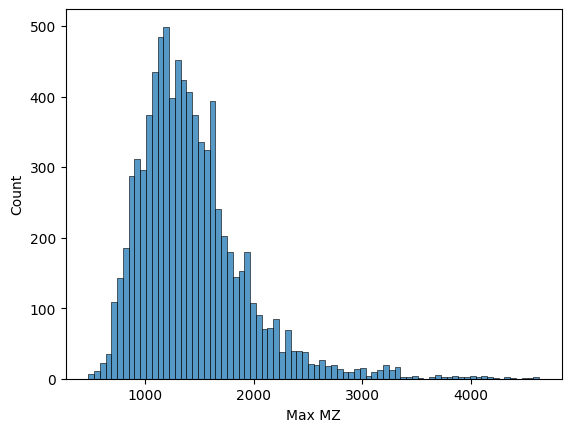

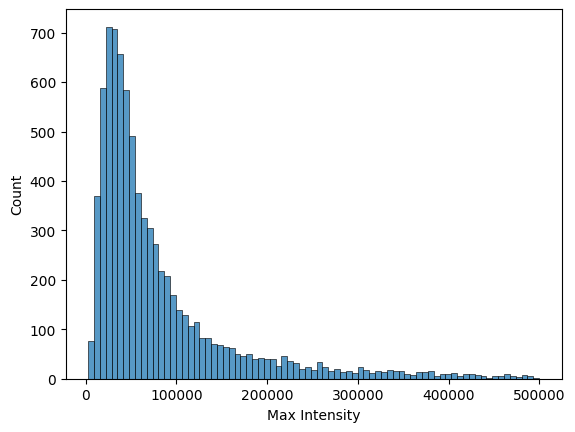

In [25]:
# Plot mz_maxes distribution
sns.histplot(mz_maxes)
plt.xlabel('Max MZ')
plt.figure()

# Remove outliers for this one
intensity_maxes_filtered = [x for x in intensity_maxes if x < 500000]
sns.histplot(intensity_maxes_filtered)
plt.xlabel('Max Intensity')

In [26]:
# For mz_maxes, print count and percent of total where less than 100, less than 200, etc
for i in range(0, 5000, 100):
    print('mz_maxes less than {}: {} ({}%)'.format(i, len([x for x in mz_maxes if x < i]), round(len([x for x in mz_maxes if x < i])/len(mz_maxes)*100, 3)))

# For intensity_maxes, print count and percent of total where less than 100, less than 200, etc up until max value
# Too big to print all, just see plot below
# for i in range(0, 500000, 1000):
#     print('intensity_maxes less than {}: {} ({}%)'.format(i, len([x for x in intensity_maxes if x < i]), round(len([x for x in intensity_maxes if x < i])/len(intensity_maxes)*100, 3)))
# print(max(intensity_maxes))


mz_maxes less than 0: 0 (0.0%)
mz_maxes less than 100: 0 (0.0%)
mz_maxes less than 200: 0 (0.0%)
mz_maxes less than 300: 0 (0.0%)
mz_maxes less than 400: 0 (0.0%)
mz_maxes less than 500: 3 (0.036%)
mz_maxes less than 600: 23 (0.276%)
mz_maxes less than 700: 82 (0.982%)
mz_maxes less than 800: 336 (4.025%)
mz_maxes less than 900: 791 (9.476%)
mz_maxes less than 1000: 1349 (16.161%)
mz_maxes less than 1100: 2091 (25.051%)
mz_maxes less than 1200: 3006 (36.013%)
mz_maxes less than 1300: 3815 (45.705%)
mz_maxes less than 1400: 4608 (55.205%)
mz_maxes less than 1500: 5316 (63.688%)
mz_maxes less than 1600: 5979 (71.631%)
mz_maxes less than 1700: 6543 (78.387%)
mz_maxes less than 1800: 6897 (82.628%)
mz_maxes less than 1900: 7176 (85.971%)
mz_maxes less than 2000: 7460 (89.373%)
mz_maxes less than 2100: 7645 (91.59%)
mz_maxes less than 2200: 7765 (93.027%)
mz_maxes less than 2300: 7880 (94.405%)
mz_maxes less than 2400: 7976 (95.555%)
mz_maxes less than 2500: 8051 (96.454%)
mz_maxes less tha

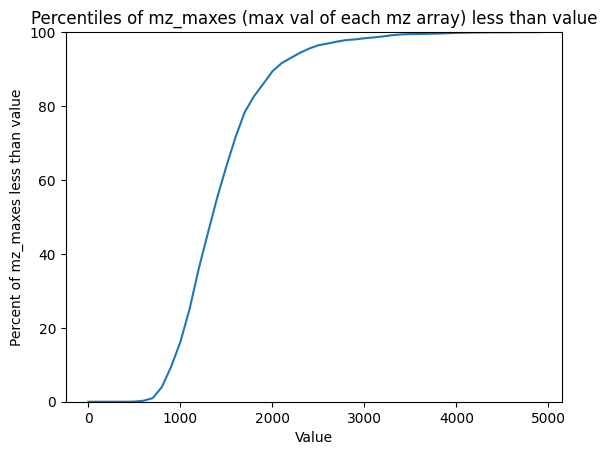

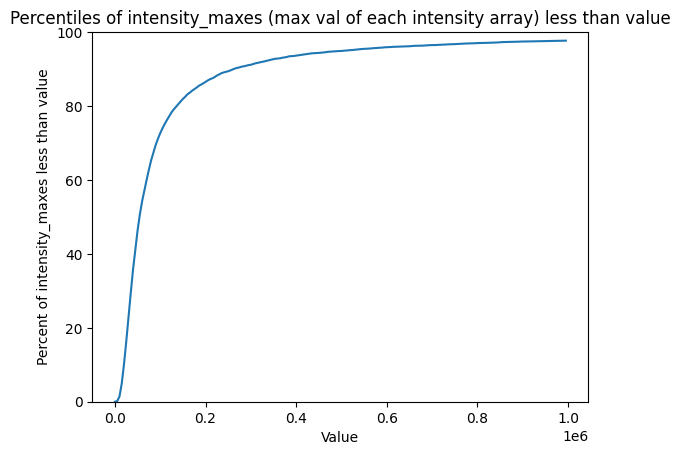

In [27]:
# line plot representing the percentiles of mz_maxes less than values
x = [x for x in range(0, 5000, 100)]
y = [round(len([x for x in mz_maxes if x < i])/len(mz_maxes)*100, 3) for i in range(0, 5000, 100)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of mz_maxes less than value')
plt.xlabel('Value')
plt.title('Percentiles of mz_maxes (max val of each mz array) less than value')
plt.show()

# line plot representing the percentiles of intensity_maxes less than values
x = [x for x in range(0, 1000000, 5000)]
y = [round(len([x for x in intensity_maxes if x < i])/len(intensity_maxes)*100, 3) for i in range(0, 1000000, 5000)]
plt.plot(x, y)
plt.ylim(0, 100)
plt.ylabel('Percent of intensity_maxes less than value')
plt.xlabel('Value')
plt.title('Percentiles of intensity_maxes (max val of each intensity array) less than value')
plt.show()

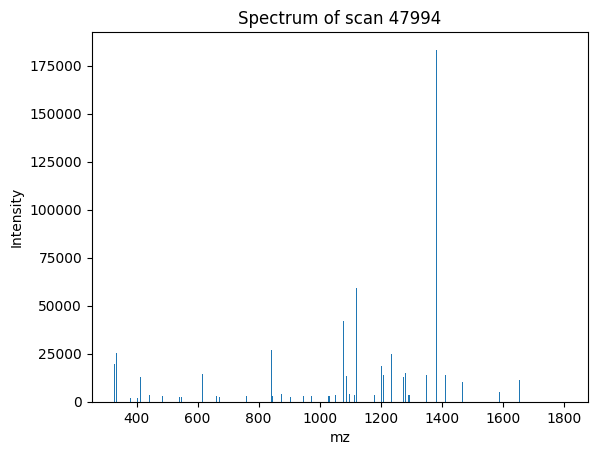

In [28]:
# Plot the spectrum of a scan, bars are intensity, x axis is mz
plt.bar(train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr'], train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['intensity_arr'])
plt.xlabel('mz')
plt.ylabel('Intensity')
plt.title('Spectrum of scan 47994')
plt.show()


2023-05-18 23:18:34,035:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
2023-05-18 23:18:34,036:WARNING:matchms:add_precursor_mz:No precursor_mz found in metadata.
Cosine score is 0.00 with 0 matched peaks


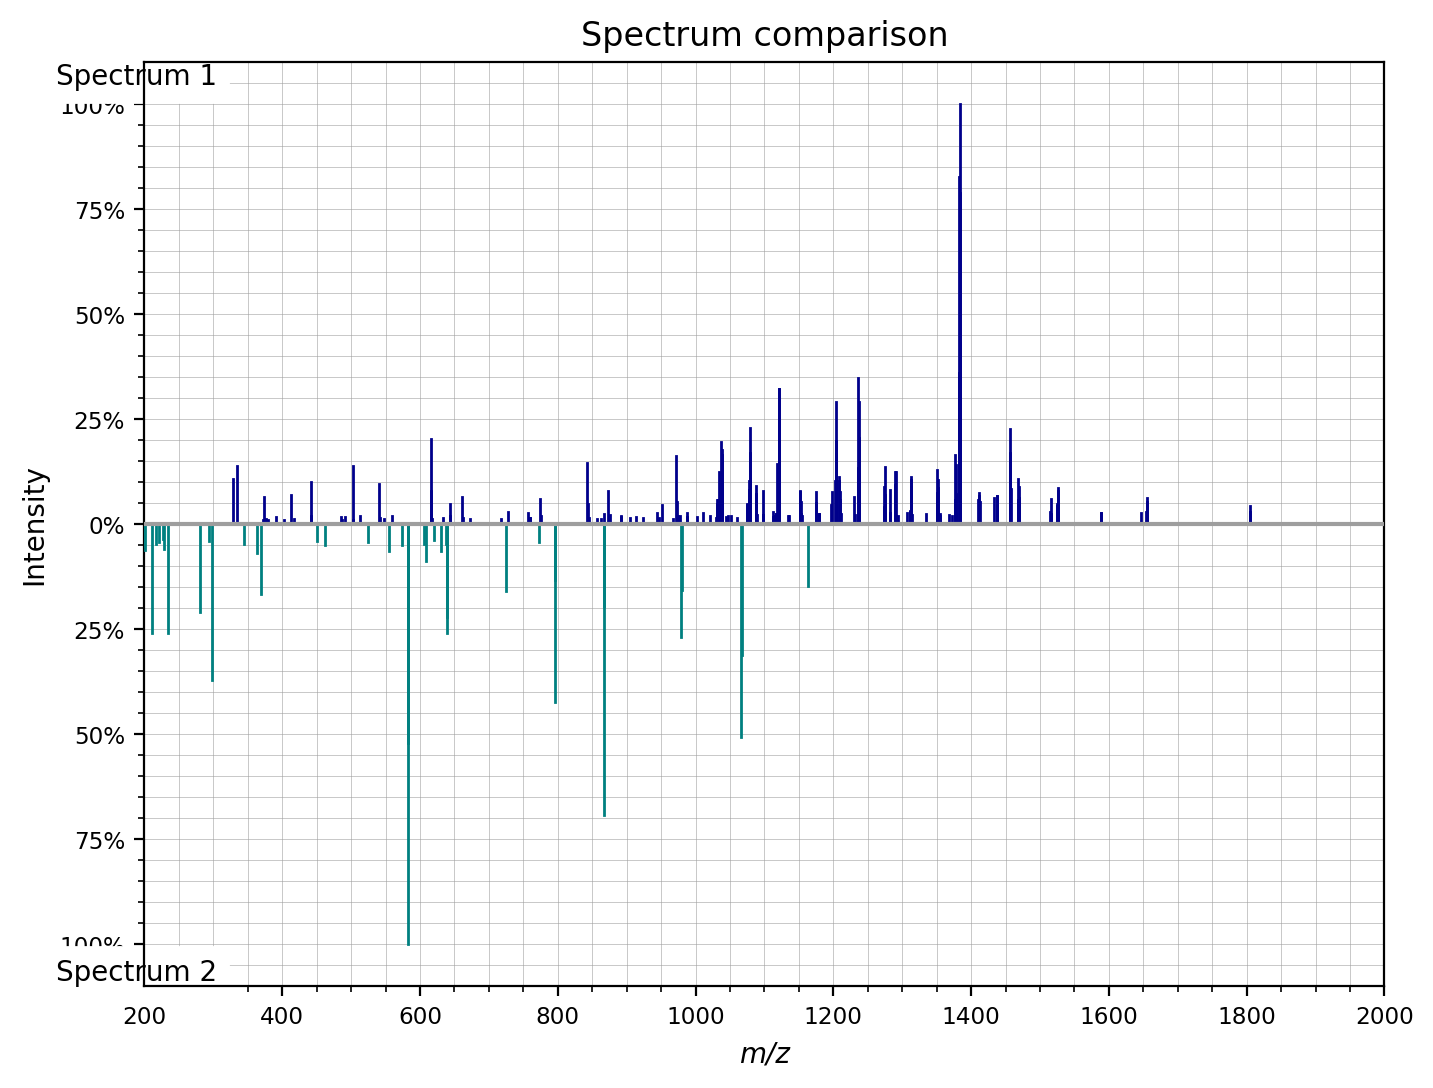

In [52]:

from matchms import Scores, Spectrum
from matchms.similarity import CosineGreedy

# Get mz and intensity arrays for a scan
mz = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['mz_arr']
intensity = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47994]['intensity_arr']

# Convert mz to array of float
mz = np.array([float(x) for x in mz])
intensity = np.array([float(x) for x in intensity])


spectrum = Spectrum(mz=mz,
                    intensities=intensity,
                    metadata={'id': 'spectrum1',
                              "peak_comments": {mz[0]: "the peak at 0 index m/z"}})

# print(spectrum.peaks.mz[0])
# print(spectrum.peaks.intensities[0])
# print(spectrum.get('id'))
# print(spectrum.peak_comments.get(328.1126708984375))

# spectrum.plot()

# Repeat the above for a 2nd scan
mz2 = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47995]['mz_arr']
intensity2 = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][47995]['intensity_arr']

mz2 = np.array([float(x) for x in mz2])
intensity2 = np.array([float(x) for x in intensity2])

spectrum2 = Spectrum(mz=mz2,
                    intensities=intensity2,
                    metadata={'id': 'spectrum2',
                                "peak_comments": {mz2[0]: "the peak at 0 index m/z"}})

# spectrum2.plot()
spectrum.plot_against(spectrum2)

# Calculate cosine similarity between the 2 spectra
cosine_greedy = CosineGreedy(tolerance=0.2)
score = cosine_greedy.pair(spectrum, spectrum2)
print(f"Cosine score is {score['score']:.2f} with {score['matches']} matched peaks")


In [1]:
from matchms import set_matchms_logger_level
set_matchms_logger_level("ERROR")

# Create spectrums array for all scans in a file
spectrums = []
for scan_num in train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML']:
    mz = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['mz_arr']
    intensity = train_data_spectrum['01088_A05_P010740_S00_N33_R1.mzML'][scan_num]['intensity_arr']

    mz = np.array([float(x) for x in mz])
    intensity = np.array([float(x) for x in intensity])

    spectrum = Spectrum(mz=mz,
                        intensities=intensity,
                        metadata={'id': 'spectrum1',
                                  "peak_comments": {mz[0]: "the peak at 0 index m/z"}})
    spectrums.append(spectrum)

# Calculate similarity between all scans in a file
# scores = CosineGreedy(tolerance=0.1, mz_power=0, intensity_power=0)
# score = scores.matrix(spectrums)
# print(score)

# For every spectrum, calculate similarity to every other spectrum
scores = CosineGreedy(tolerance=0.1, mz_power=0, intensity_power=0)
score = scores.matrix(spectrums[0:5], spectrums[0:5])
print(score)


NameError: name 'train_data_spectrum' is not defined